In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.plots import *
import os

In [3]:
PATH = 'data/furniture_imat/'
! ls {PATH}

download_scripts  test	     tmp    train.json	validation.json
subm		  test.json  train  valid	zips


In [4]:
print(os.listdir(f'{PATH}train/1')[:5], os.listdir(f'{PATH}train/2')[:5], os.listdir(f'{PATH}train/3')[:5])

['90427.jpeg', '90632.jpeg', '90109.jpeg', '90680.jpeg', '90945.jpeg'] ['92005.jpeg', '92158.jpeg', '92742.jpeg', '91685.jpeg', '91431.jpeg'] ['54041.jpeg', '55196.jpeg', '55243.jpeg', '56243.jpeg', '54962.jpeg']


In [5]:
def get_1st(path): return glob(f'{path}/*.*')[0]

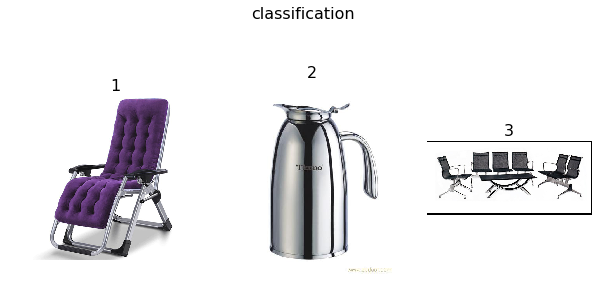

In [6]:
list_paths = [f"{PATH}train/1/90427.jpeg", f"{PATH}train/2/92158.jpeg", f"{PATH}train/3/55196.jpeg"]
titles = ['1','2', '3']
plots_from_files(list_paths, titles= titles, maintitle="classification")

In [7]:
arch = resnet34
sz = 64
bs = 64

In [8]:
tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1 )
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name='train', val_name='valid', test_name='test')

In [9]:
len(data.classes)

128

In [10]:
print(len(data.trn_ds), len(data.val_ds), len(data.test_ds))

192171 6309 12704


In [11]:
# Check if the total number of  classes representing training samples are present in validation also
print (len(np.unique(data.trn_ds.y)))
print(len(np.unique(data.val_ds.y)))
if(len(np.unique(data.trn_ds.y)) == len(np.unique(data.val_ds.y))):
    print('perfect')
else:
    print('no match')

128
128
perfect


In [13]:
len(data.classes), data.classes[:5]

(128, ['1', '10', '100', '101', '102'])

In [13]:
size_dict = {k : PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames }
row_sz, col_sz =list(zip(*size_dict.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

(array([ 70474., 117574.,   2905.,    638.,    314.,    138.,     82.,     40.,      1.,      5.]),
 array([   1. ,  788.3, 1575.6, 2362.9, 3150.2, 3937.5, 4724.8, 5512.1, 6299.4, 7086.7, 7874. ]),
 <a list of 10 Patch objects>)

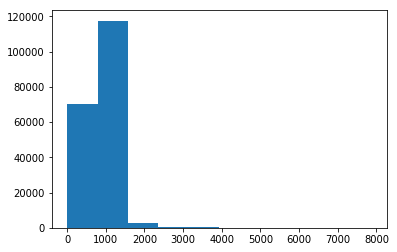

In [14]:
plt.hist(row_sz)

(array([ 61610., 125675.,   3233.,    963.,    368.,    197.,     91.,     23.,      9.,      2.]),
 array([   1. ,  662.3, 1323.6, 1984.9, 2646.2, 3307.5, 3968.8, 4630.1, 5291.4, 5952.7, 6614. ]),
 <a list of 10 Patch objects>)

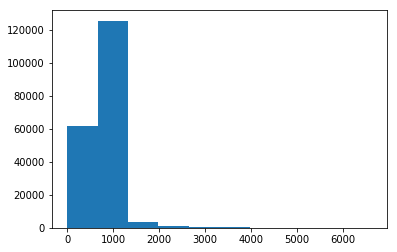

In [15]:
plt.hist(col_sz)

(array([   176.,     18.,   3863.,  14947.,   9117.,  12340.,  13523.,  18129., 100426.,   2567.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4, 899.2, 999. ]),
 <a list of 10 Patch objects>)

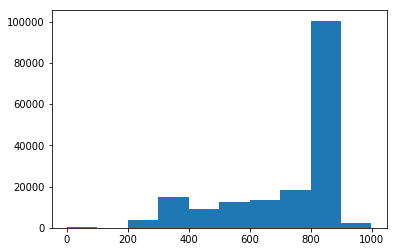

In [16]:
plt.hist(row_sz[row_sz < 1000])

(array([  176.,    19.,  5426., 22599., 14578., 11762., 10288., 12642., 99377.,  2820.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4, 899.2, 999. ]),
 <a list of 10 Patch objects>)

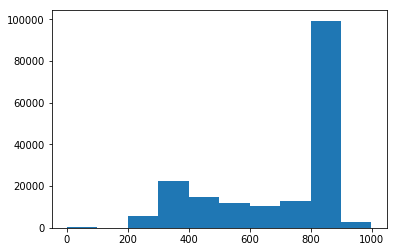

In [17]:
plt.hist(col_sz[col_sz < 1000])

In [14]:
data = data.resize(int(sz*1.3), 'tmp')

In [15]:
learn = ConvLearner.pretrained(arch, data)
learn.lr_find()

 81%|████████  | 2432/3003 [02:30<00:35, 16.21it/s, loss=11.9]

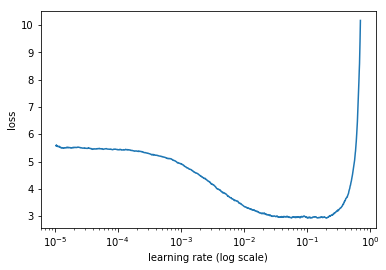

In [16]:
learn.sched.plot()

In [17]:
lr = 0.008
#learn.fit(lr, n_cycle= 3)

In [15]:
lr = 0.008
learn.fit(lr, n_cycle= 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      2.580095   2.399869   0.388017  
    1      2.380669   2.196488   0.429545                     
    2      2.32975    2.155432   0.440165                     
    3      2.278625   2.111519   0.451894                     
    4      2.235748   2.064214   0.462672                     
    5      2.195264   2.042619   0.465842                     
    6      2.185154   2.0322     0.468537                     



[array([2.0322]), 0.4685370107047776]

In [18]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  1%|▏         | 41/3003 [00:06<07:45,  6.37it/s, loss=5.55]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.664602   1.594884   0.560628  
    1      1.423793   1.350547   0.62181                      
    2      1.19028    1.232423   0.653511                     
    3      1.224834   1.239632   0.65462                      
    4      1.018717   1.13596    0.686638                     
    6      0.825623   1.049007   0.705976                      



[array([1.04901]), 0.7059755904547177]

In [19]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1 )
    data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name='train', val_name='valid', test_name='test')    
    data = data.resize(int(sz*1.3), 'tmp')
    return data

In [28]:
sz = 128
learn.set_data(get_data(sz, bs))
data = data.resize(int(sz*1.3), 'tmp')
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      1.259452   1.25469    0.643367  
    1      1.152788   1.184501   0.657156                     
    2      1.126425   1.171195   0.660485                     
    3      1.143463   1.143118   0.666667                     
    4      1.106374   1.122526   0.674116                     
    5      1.072886   1.114499   0.677445                     
    6      1.079166   1.113218   0.676811                     



[array([1.11322]), 0.6768109050184786]

In [20]:
sz = 128
learn.set_data(get_data(sz, bs))
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.832034   0.848492   0.750357  
    1      0.790053   0.812668   0.764939                      
    2      0.644904   0.751609   0.780155                      
    3      0.694675   0.789266   0.768585                      
    4      0.576566   0.731883   0.791092                      
    5      0.489327   0.696603   0.803614                      
    6      0.449329   0.695718   0.80187                       



[array([0.69572]), 0.8018703437924745]

In [30]:
sz = 256
learn.set_data(get_data(sz, bs))
data = data.resize(int(sz*1.3), 'tmp')
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.771441   0.826654   0.755904  
    1      0.742938   0.799878   0.760976                      
    2      0.732555   0.786231   0.764463                      
    3      0.731144   0.771709   0.770487                      
    4      0.686827   0.764419   0.771596                      
    5      0.69969    0.758683   0.7754                        
    6      0.672388   0.757117   0.776668                      



[array([0.75712]), 0.7766682517322577]

In [21]:
sz = 256
learn.set_data(get_data(sz, bs))
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.585611   0.64273    0.807576  
    1      0.538311   0.634649   0.815819                      
    2      0.420748   0.588921   0.825804                      
    3      0.51234    0.62976    0.813124                      
    4      0.416266   0.603688   0.827706                      
    5      0.339502   0.574119   0.836583                      
    6      0.289528   0.572457   0.839119                      



[array([0.57246]), 0.8391187193843789]

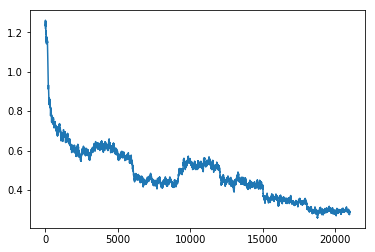

In [22]:
learn.sched.plot_loss()

In [23]:
preds, y = learn.TTA(is_test = True)

In [24]:
print(y.shape, preds.shape)

(12704, 1) (5, 12704, 128)


In [28]:
def create_csv(preds, y, subm_no, isTTA):
    if isTTA:
        final_preds = np.mean(preds, 0)
    else:
        final_preds = preds
    high_probs = np.max(final_preds,1)
    high_prob_index = np.argmax(final_preds,1)
    print(high_prob_index, high_probs, np.exp(high_probs))
    print(np.unique(high_prob_index, return_counts=True))
    high_prob_class = [ data.classes[index] for index in high_prob_index ]
    output_df = pd.DataFrame(high_prob_class, columns=['predicted'])
    output_df.insert(loc = 0, column = 'id', value = [name[5:-4] for name in data.test_ds.fnames])
    print(output_df.head())
    SUBM = f'{PATH}subm/'
    os.makedirs(SUBM, exist_ok = True)
    output_df.to_csv(f'{SUBM}subm_furniture_'+ str(subm_no) +'.csv', index=False)
    FileLink(f'{SUBM}subm_furniture_'+ str(subm_no) +'.csv')

In [30]:
create_csv(preds, y, 1, True)

[ 12  43   6 ... 112 105  60] [-0.00036 -0.05171 -0.00787 ... -0.      -0.05478 -0.00084] [0.99964 0.94961 0.99216 ... 1.      0.94669 0.99916]
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127]), array([ 95, 117,  79, 102, 105, 138, 102,  64, 108,  99,  98,  93, 101,  77,  95, 134, 109,  81,  94, 101,
       106, 101, 103,  95, 101,  86, 107, 103,  62, 110, 

In [27]:
data.test_ds.fnames

['test/9885.jpg',
 'test/2701.jpg',
 'test/11231.jpg',
 'test/2964.jpg',
 'test/10651.jpg',
 'test/8302.jpg',
 'test/3656.jpg',
 'test/146.jpg',
 'test/2383.jpg',
 'test/8375.jpg',
 'test/12209.jpg',
 'test/2759.jpg',
 'test/7196.jpg',
 'test/6623.jpg',
 'test/9046.jpg',
 'test/3139.jpg',
 'test/2993.jpg',
 'test/7106.jpg',
 'test/1597.jpg',
 'test/7190.jpg',
 'test/4406.jpg',
 'test/11664.jpg',
 'test/9112.jpg',
 'test/12505.jpg',
 'test/1127.jpg',
 'test/8657.jpg',
 'test/5462.jpg',
 'test/4651.jpg',
 'test/9998.jpg',
 'test/12051.jpg',
 'test/11696.jpg',
 'test/1547.jpg',
 'test/12748.jpg',
 'test/4219.jpg',
 'test/8107.jpg',
 'test/9354.jpg',
 'test/6594.jpg',
 'test/10312.jpg',
 'test/8801.jpg',
 'test/8068.jpg',
 'test/8700.jpg',
 'test/6761.jpg',
 'test/7812.jpg',
 'test/3116.jpg',
 'test/6870.jpg',
 'test/11602.jpg',
 'test/7636.jpg',
 'test/5760.jpg',
 'test/962.jpg',
 'test/82.jpg',
 'test/6615.jpg',
 'test/3189.jpg',
 'test/7267.jpg',
 'test/11532.jpg',
 'test/5915.jpg',
 't

In [7]:
SUBM = f'{PATH}subm/'

In [8]:
! ls 

adamw-sgdw-demo.ipynb			lesson5-movielens.ipynb
cifar10.ipynb				lesson6-rnn.ipynb
cifar10-simplenet.ipynb			lesson6-sgd.ipynb
data					lesson7-CAM.ipynb
Dog Breed.ipynb				lesson7-cifar10.ipynb
embedding_refactoring_unit_tests.ipynb	nasnet.ipynb
excel					nlp-arxiv.ipynb
fastai					nlp.ipynb
fish.ipynb				planet_cv.ipynb
furniture.ipynb				planet.py
images					ppt
imaterialist_fashion.ipynb		__pycache__
keras_lesson1.ipynb			rossman_exp.py
lang_model-arxiv.ipynb			sample_submission.csv
lang_model.ipynb			scripts
lesson1.ipynb				submission.csv
lesson1-rxt50.ipynb			test_transforms.ipynb
lesson1-vgg.ipynb			Untitled.ipynb
lesson2-image_models.ipynb		Whale.ipynb
lesson3-rossman.ipynb			xor.ipynb
lesson4-imdb.ipynb


In [7]:
! ls data/furniture_imat/subm/

subm_furniture_1.csv


In [22]:
df = pd.read_csv('data/furniture_imat/subm/subm_furniture_1.csv')

In [23]:
df = df.sort_values(by = ['id'])

In [24]:
df = df.set_index('id')

In [25]:
df2 = df.reindex(pd.RangeIndex(df.index.max() + 1)).ffill()

In [26]:
df2 = df2[1:]

In [27]:
df3 = df2.reset_index(level=0)
df3 = df3.rename(index=str, columns={"index": "id"})
df3.head()

,id,predicted
0,1,12.0
1,2,71.0
2,3,91.0
3,4,54.0
4,5,126.0


In [32]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok = True)
df3.to_csv(f'{SUBM}subm_furniture_'+ str(2) +'.csv', index=False)
FileLink(f'{SUBM}subm_furniture_'+ str(2) +'.csv')

/home/paperspace/fastai/courses/dl1/data/furniture_imat/subm/subm_furniture_2.csv